<a href="https://colab.research.google.com/github/mghildi/NLP_Document_Classification/blob/main/NLP_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
!gdown 1FBpAbZeV6dVy7O64MKueC-zH3ly9ZU5K

Downloading...
From: https://drive.google.com/uc?id=1FBpAbZeV6dVy7O64MKueC-zH3ly9ZU5K
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 32.0MB/s]


In [4]:
df = pd.read_csv("/content/flipitnews-data.csv")

In [5]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


So we have 2 column Category (Dependent variable) and Article (independent) variable

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


We dont have any null values and both the columns are of string data type. Now lets see how the category are distributed.

In [7]:
vc = df['Category'].value_counts()
vc

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64

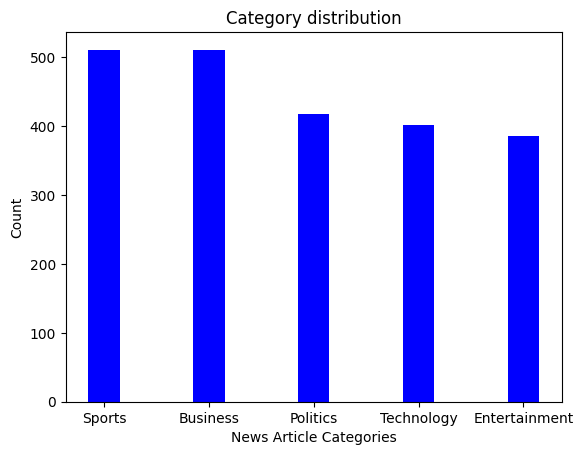

In [8]:
plt.bar(vc.index , vc.values, color = 'blue', width = 0.3)
plt.title('Category distribution')
plt.xlabel('News Article Categories')
plt.ylabel('Count')
plt.show()

In [9]:
#download stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

We have 5 category in total. it does not look like complete balanced data set however not huge difference in count of categories

In [11]:
nltk.download('average_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
def processing(text):
  #conatins only alphabet
  text= re.sub(r'[^a-zA-Z]',' ',text)
  #remove double space
  text = re.sub(r'\s+',' ',text)
  #remove space from start and end
  text= text.strip()
  #tokenize the text
  words = word_tokenize(text)
  #get lsit of english stopword
  stop_words=set(stopwords.words('english'))
  #remove stop words
  filtered_words= [word for word in words if word.lower() not in stop_words]
  #join filtered words to string
  filtered_text = ' '.join(filtered_words)
  lemmatizer = WordNetLemmatizer()
  tokens1 = word_tokenize(filtered_text)
  lemmatized_token = []
  for token in tokens1:
    lemma = lemmatizer.lemmatize(token)
    lemmatized_token.append(lemma)
  lemmatized_sentence = ' '.join(lemmatized_token)
  return lemmatized_sentence

In [13]:
#news article looks like before and after the processing.
print(df['Article'][0])
print(processing(df['Article'][0]))

tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high-

In [14]:
df['pro_article'] = df['Article'].apply(processing)
df.head()

,Category,Article,pro_article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [15]:
label_encoder = LabelEncoder()
df['pro_Category'] = label_encoder.fit_transform(df['Category'])
for category, label_encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
  print(f"{category} : {label_encoded}")


Business : 0
Entertainment : 1
Politics : 2
Sports : 3
Technology : 4


In [19]:
#bag of words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['pro_article'])


print(f"vocab:  {vectorizer.get_feature_names_out()}")
# Convert to DataFrame
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# Concatenate the original DataFrame with the Bag-of-Words DataFrame
result_df = pd.concat([df, df_bow], axis=1)
result_df.head()

vocab:  ['aa' 'aaa' 'aac' ... 'zutons' 'zvonareva' 'zvyagintsev']


,Category,Article,pro_article,pro_Category,aa,aaa,aac,aadc,aaliyah,aaltra,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#use TFIDF
# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
X = vectorizer.fit_transform(df['pro_article'])

# Convert to DataFrame (optional)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the original DataFrame with the TF-IDF DataFrame
result_df = pd.concat([df, tfidf_df], axis=1)
result_df.head()

,Category,Article,pro_article,pro_Category,aa,aaa,aac,aadc,aaliyah,aaltra,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X = vectorizer.fit_transform(df['pro_article'])
y = df['Category']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     Business       0.94      0.95      0.95       101
Entertainment       1.00      0.89      0.94        81
     Politics       0.92      0.98      0.95        83
       Sports       0.99      1.00      0.99        98
   Technology       0.95      0.98      0.96        82

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



In [30]:
#Decision Tree
classifier= DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     Business       0.77      0.74      0.75       101
Entertainment       0.94      0.75      0.84        81
     Politics       0.78      0.84      0.81        83
       Sports       0.91      0.91      0.91        98
   Technology       0.77      0.88      0.82        82

     accuracy                           0.82       445
    macro avg       0.83      0.83      0.82       445
 weighted avg       0.83      0.82      0.82       445



In [32]:
#Nearest Neighbors
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     Business       0.94      0.86      0.90       101
Entertainment       0.97      0.95      0.96        81
     Politics       0.86      0.90      0.88        83
       Sports       0.97      1.00      0.98        98
   Technology       0.95      0.99      0.97        82

     accuracy                           0.94       445
    macro avg       0.94      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



In [34]:
#Random Forest
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

     Business       0.89      0.95      0.92       101
Entertainment       0.99      0.94      0.96        81
     Politics       0.94      0.94      0.94        83
       Sports       0.99      0.99      0.99        98
   Technology       0.97      0.94      0.96        82

     accuracy                           0.95       445
    macro avg       0.96      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      2225 non-null   object
 1   Article       2225 non-null   object
 2   pro_article   2225 non-null   object
 3   pro_Category  2225 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


1) How many news articles are present in the dataset that we have? - 2225



In [36]:
df['Category'].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64

Most of the news articles are from Sports category.

What are Stop Words and why should they be removed from the text data? Stop words are commonly used words in a language that typically do not carry significant meaning or contribute to the understanding of the text. Examples of stop words in English include "the," "is," "and," "a," "an," "in," etc. benefits - Reducing noise, reducing dimensionality, Improving performance

Explain the difference between Stemming and Lemmatization. Stemming reduces words to their root form by removing suffixes, whereas lemmatization also reduces words to their base form but considers the word's meaning and context.



Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other? Both Bag-of-Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency) techniques have their advantages and use cases, and neither is universally considered more efficient than the other.

BoW is simpler and computationally less expensive than TF-IDF. It represents each document as a vector of word frequencies, which can be faster to compute.
TF-IDF, on the other hand, takes into account the importance of words in a document relative to their frequency across all documents. This can provide more meaningful features, especially for longer documents, but may require more computational resources.


Based on the provided classification reports, the Naive Bayes model appears to be the best performing model among the ones listed. Here's why:

High Precision, Recall, and F1-score: The Naive Bayes model achieves high precision, recall, and F1-score across all classes. This indicates that it performs well in correctly classifying instances for each class while minimizing false positives and false negatives.

Consistently High Performance: The Naive Bayes model consistently achieves high performance metrics (precision, recall, and F1-score) across all classes. This suggests that it generalizes well to different classes and maintains its effectiveness across the dataset.

Overall Accuracy: The Naive Bayes model has the highest overall accuracy of 96%, indicating that it correctly classifies a large portion of the instances in the dataset.

Efficiency: Naive Bayes is known for its simplicity and computational efficiency, making it suitable for large datasets and real-time applications. It can handle high-dimensional data efficiently, which is beneficial for text classification tasks.

In summary, the Naive Bayes model outperforms the other models based on its high precision, recall, and F1-score across all classes, consistent performance, high overall accuracy, and computational efficiency.